<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Introduction to Computation for the Social Sciences</h1>
<h2 style="margin-top: 0.7em; margin-bottom: 0.3em;">Assignment 1</h2>
<h3 style="margin-top: 0.7em; margin-bottom: 0.3em;">Deadline Part 1: Oct 29, 23:59</h3>
<h3 style="margin-top: 0.7em; margin-bottom: 0.3em;">Deadline Parts 2-4: Nov 10, 23:59</h3>

</div>
<br>

<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">
Please push your solutions to your personal repository in our <a href='https://classroom.github.com/a/tGD_7t85'>GitHub Classroom</a></h4><br>

***

<h3>Part 1 - GitHub Setup</h3>


If you got this second part, the first part of the assignment obviously worked. Well done!

***

<h1>Deadline for the following Parts (2-4) is November 10, 2024</h1>

<h3>Part 2 - Pandas Data Frames and Data Visualization</h3>

<h4>Task 5</h4>

***a) Import the csv-file on world population***

In the Git Hub, where you pulled the assignment, you were also provided two csv-files. Please import the file on world population and store it as a data frame. Remember to load the pandas library first. 

In [29]:
import pandas as pd
pop_data = pd.read_csv("world-population-by-country-2020.csv", index_col=None, na_values="N.A.")

***b) Data Types***

Familiarize yourself with the data on world population per country. 

Often, it might be useful to rename some columns or change the data type of values.
Therefore, investigate what data types do the different columns have.


In [30]:
pop_data.dtypes

no                           int64
Country (or dependency)     object
Population 2020             object
Yearly Change               object
Net Change                  object
Density  (P/Km²)            object
Land Area (Km²)             object
Migrants (net)              object
Fert. Rate                 float64
Med. Age                   float64
Urban Pop %                 object
World Share                 object
dtype: object

Rename the columns using the following dictionary:

`{'no' : 'Nr.', 'Country (or dependency)' : 'Country', 'Population 2020' : 'Population', 'Yearly Change' : 'Yearly_%_Change',
'Net Change' : 'Net_Change', 'Density  (P/Km²)' : 'Density', 'Land Area (Km²)' : 'Area', 'Migrants (net)' : 'Net_Migrants',
'Fert. Rate' : 'Fert_Rate', 'Med. Age' : 'Median_Age', 'Urban Pop %' : 'Urban_Pop_%', 'World Share' : 'World_Share'}`

In [31]:
pop_data.rename(columns={'no' : 'Nr.', 'Country (or dependency)' : 'Country', 'Population 2020' : 'Population', 'Yearly Change' : 'Yearly_%_Change',
'Net Change' : 'Net_Change', 'Density  (P/Km²)' : 'Density', 'Land Area (Km²)' : 'Area', 'Migrants (net)' : 'Net_Migrants',
'Fert. Rate' : 'Fert_Rate', 'Med. Age' : 'Median_Age', 'Urban Pop %' : 'Urban_Pop_%', 'World Share' : 'World_Share'},inplace=True)

***c) Filter out all counties, that have missing values somewhere in the table. Do they contribute a relevant share to the world-population? If not, simply drop these rows (countires)***


In [32]:
na_countries = pop_data[pop_data.isnull().any(axis=1)]
print(na_countries)

pop_data.dropna(inplace=True) # just 5 countries have more than a million inhabitants, should be fine to drop

     Nr.                   Country  Population Yearly_%_Change Net_Change  \
49    50                 Venezuela  28,435,940          -0.28%    -79,889   
103  104                 Hong Kong   7,496,981           0.82%     60,827   
113  114                 Singapore   5,850,342           0.79%     46,005   
128  129                    Kuwait   4,270,571           1.51%     63,488   
140  141               Puerto Rico   2,860,853          -2.47%    -72,555   
166  167                     Macao     649,335           1.39%      8,890   
176  177                Guadeloupe     400,124           0.02%         68   
201  202               Isle of Man      85,033           0.53%        449   
202  203                   Andorra      77,265           0.16%        123   
203  204                  Dominica      71,986           0.25%        178   
204  205            Cayman Islands      65,722           1.19%        774   
205  206                   Bermuda      62,278          -0.36%       -228   

***d) Change the data type of all numeric columns to int (or float). Find a way to deal with the percentage-columns and comma.***


In [33]:
pop_data.replace(["%",","],["",""], regex=True, inplace=True) # the only intended string column `country` doesn't contain a reasonable "," so I was able to delete all "," in the df

pop_data[["Population","Net_Change","Density","Area","Net_Migrants"]] = pop_data[["Population","Net_Change","Density","Area","Net_Migrants"]].astype(int) # transform to integer
pop_data["Urban_Pop_%"] = pop_data["Urban_Pop_%"].astype(int) / 100 # transform percentage into decimal represenation
pop_data[["Yearly_%_Change","World_Share"]] = (pop_data[["Yearly_%_Change","World_Share"]].astype(float) / 100).round(5) # transform percentage to decimal representaion

pop_data.rename(columns={"Urban_Pop_%":"Urban_Pop_Ratio","Yearly_%_Change": "Yearly_Change_Ratio","World_Share":"World_Share_Fraction"},inplace=True) # this was no necessity, but for clarity I decided to do it

***e) Import the second csv-file containing countries, their capital and continent. For nice visualisations later, please merge the information on continents on to your population-data-frame.***

*Hint: use the pandas function `.merge()` and see the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) for details*.

In [34]:
country_data = pd.read_csv("countries-continents-capitals.csv",index_col=None, encoding="ISO-8859-1") # there are still some capitals left where the encoding didn't work
pop_data = pop_data.merge(country_data,left_on="Country",right_on="Country/Territory").drop("Country/Territory",axis=1)

***f) For some basic descriptive statistics, please find the following countries:***

- *Top 5* countries in absolute population numbers
- The country with the *highest* population density
- The counrty with the *highest* and *lowest* yearly %-change

In [35]:
# 1. top 5
top5_pop = pop_data.sort_values("Population",ascending=False).head(5)
top5_pop[["Country","Population"]]

,Country,Population
0,China,1439323776
1,India,1380004385
2,United States,331002651
3,Indonesia,273523615
4,Pakistan,220892340


In [36]:
# 2. max()
high_dens = pop_data.sort_values("Density",ascending=False).head(1)
high_dens[["Country","Density"]]

,Country,Density
142,Bahrain,2239


In [12]:
# 3. max() and min()
max_change = pop_data.sort_values("Yearly_Change_Ratio",ascending=False).head(1)
min_change = pop_data.sort_values("Yearly_Change_Ratio").head(1)

print("Max Change:")
print(max_change[["Country","Yearly_Change_Ratio"]])
print("\nMin Change:")
print(min_change[["Country","Yearly_Change_Ratio"]])

Max Change:
   Country  Yearly_Change_Ratio
55   Niger               0.0384

Min Change:
       Country  Yearly_Change_Ratio
141  Lithuania              -0.0135


***g) Find the absolute population number, the mean population and %-share among the world-population, when grouping the countires on continent. Save the resulting table into a separate data frame.***
 

In [37]:
world_pop_abs = pop_data["Population"].sum()
continent_df = pop_data.groupby(["Continent"]).agg(Absolute_Population = ("Population","sum"),
                                                   Mean_Population = ("Population","mean"))
continent_df["World_Share_Pop"] = continent_df["Absolute_Population"] / world_pop_abs
continent_df["Mean_Population"] = continent_df["Mean_Population"].round(1) # to display it nicely in Jupyter
continent_df["World_Share_Pop"] = continent_df["World_Share_Pop"].round(4)
continent_df

,Absolute_Population,Mean_Population,World_Share_Pop
Continent,,,
Africa,1307025251,25135101.0,0.1699
Asia,4616478773,102588417.2,0.6000
Europe,737603587,18912912.5,0.0959
North America,587909443,26723156.5,0.0764
Oceania,42867268,3297482.2,0.0056
South America,402320346,33526695.5,0.0523


***h) Plot the absolute population per continent in descending order, using a bar chart. Don't forget to add a header, axis-labels, a legend (if required) and so on.***
 

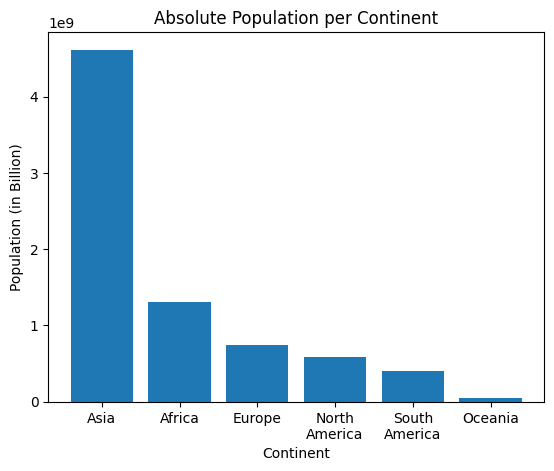

In [38]:
import matplotlib.pyplot as plt
import numpy as np

continent_df_sorted = continent_df.sort_values(by="Absolute_Population", ascending=False)
plt.bar(continent_df_sorted.index,continent_df_sorted["Absolute_Population"])
plt.title("Absolute Population per Continent")
plt.xlabel("Continent")
plt.ylabel("Population (in Billion)")
plt.xticks(np.arange(6), ['Asia', 'Africa', 'Europe','North\nAmerica','South\nAmerica','Oceania']) #not necessary, used for better readability
plt.show()

***i) Visualize the distribution of the continents populations by using a violin plot (if you are not familiar with violin plots, read for example [here](https://mode.com/blog/violin-plot-examples/)). Describe your findings from the two plots in 2 - 3 sentences.***

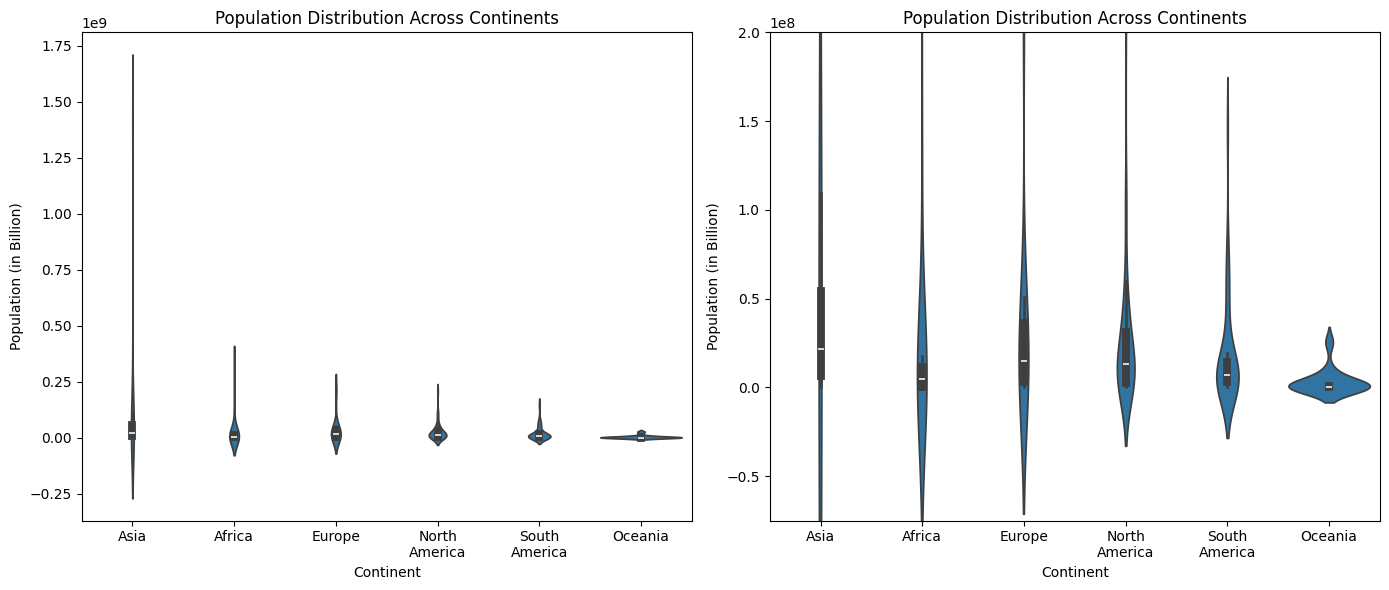

In [39]:
import seaborn as sns

# Violin plot without y-axis limits
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.violinplot(data = pop_data, x = "Continent", y="Population")
plt.title("Population Distribution Across Continents")
plt.xlabel("Continent")
plt.ylabel("Population (in Billion)")
plt.xticks(np.arange(6), ['Asia', 'Africa', 'Europe','North\nAmerica','South\nAmerica','Oceania'])

# Violin plot with y-axis limits for better visualization of continents beside Asia
plt.subplot(1, 2, 2)
sns.violinplot(data = pop_data, x = "Continent", y="Population")
plt.title("Population Distribution Across Continents")
plt.xlabel("Continent")
plt.ylabel("Population (in Billion)")
plt.xticks(np.arange(6), ['Asia', 'Africa', 'Europe','North\nAmerica','South\nAmerica','Oceania'])
plt.ylim(-75000000, 200000000)
plt.tight_layout() # for better horizontal alignment
plt.show()

***Interprete your plot here:***

- The left violin plot shows the population distribution across continents without limits on the y-axis, making interpretation difficult due to the significant distortion caused by Asia's highly populated countries. To aid interpretation, the right plot presents the data on a more restricted scale. Interestingly, although Africa has a higher overall population than Europe and the Americas, the median population per country is lower, likely due to a few highly populated African countries skewing the distribution. The appearance of negative values results from interquartile range calculation and does not hold any real-world meaning in this context.


<h3>Part 3 - Lambda Functions and List/Dictionary Comprehension</h3>

<h4>Task 6</h4>

***a) Lambda Functions***

Lambda functions are a handy way to define small, helpful functions. The basic syntax was: 

`lambda <parameter>, … : expression`

Use a lambda function to obtain the dictionary representing the person closest to their 50th birthday from a list of dictionaries in the following form (if there are multiple people with the same distance, it is enough to return one):


In [40]:
people = [{'name': 'Laurie Pineda', 'age': 39}, {'name': 'Tommy Harper', 'age': 21}, 
                    {'name': 'Jeffery Short', 'age': 54}]

people 

[{'name': 'Laurie Pineda', 'age': 39},
 {'name': 'Tommy Harper', 'age': 21},
 {'name': 'Jeffery Short', 'age': 54}]

In [41]:
people_sorted = sorted(people,key=lambda x: abs(50 - x['age']))
people_sorted[0]

{'name': 'Jeffery Short', 'age': 54}

***b) List Comprehension***

We’ve also learned about list comprehension. Here, the syntax was:
`L = [<element> for <element> in <list> if <Condition>]`

Use list comprehensions to write a Python function `remove_long_words()` that:
- accepts a sentence and an integer n as input parameters
- uses the split() function of String objects to split the sentence into words
- stores the individual words in a list
- removes all words that are longer than n characters from the list, thereby creating a new list (*hint:* here, you need to use the list comprehension )
- prints the new list

Make sure to include comments and a function description.

In [50]:
def remove_long_words(sentence, number): 
    """
    Function that removes words that are larger than a specified integer from a sentence
    
    Parameters
    ----------
    sentence: String
        sentence from where you want to remove longer words
        
    number: integer
        minimum length words get cut off
    """
    words = sentence.split(" ") # splits the sentence into words
    short_words = [word for word in words if len(word) <= number] # list comprehension that just keeps the words with a length smaller or equal to the specified integer 

    print(short_words)

In [51]:
# Test
sentence = "I like bananas"

remove_long_words(sentence = sentence, number = 6) 

['I', 'like']


<h4>Task 7 - Social Science Application</h4>


***a) Senat Election Predictions***

In the GitHub folder for the first assignment, you will find a JSON file containing the US Senate 2022 Midterm Election predictions from fivethirtyeight.com

- Open and load the JSON file data into Python
- Using list/dictionary comprehension and lambda functions, extract the state-code, name and party affiliation of the candidate with the highest winning probability (``winprob``) in each state.

*Hints:*
- Start by printing one dictionary (for one state), to get an idea of the nested structure
    * Then, try to access each of the requested info for this first dictionary
    * When you have the correct info from the first dictionary, built the comprehension, to run over all dictionaries
- Ideally, you have one dictionary comprehension, running over all sub-dictionaries and extracting the desired information. Use a lambda-function to always find the candidate with the highest winning probability. 


In [52]:
import json

file = "senate_predictions_11_08.json"
with open(file, "r") as read_file:
    prediction_data= json.load(read_file)

In [53]:
prediction_infos = {race["race"]:
                    (sorted(race['candidates'],key=lambda x:x["winprob"],reverse=True)[0]["candidate"],
                     sorted(race['candidates'],key=lambda x:x["winprob"],reverse=True)[0]["party"])
                     for race in prediction_data["races"]}
#prediction_infos # wow, that cost me 2h

***b) Senat Election Results***

Additionally, you can find another JSON file with the (preliminary) US Senate Midterm Election results from “cnn.com”.
- Also, open and load this data
- Using a list/dictionary comprehension and lambda functions, extract the state-code, name and party affiliation of the winner in each state. 
    * Here, the same hints as in a) apply
- Compare the results from the prediction and the result. How many percent of the states were predicted correctly?

In [54]:
import json

file = "senate_results_11_10.json"
with open(file, "r") as read_file:
    election_data= json.load(read_file)

***

In [ ]:
election_infos = {} # create an empty dictionary 
for state in election_data: # iterates over each state in election_data
    candidates = state["candidates"] # initialize all candidates in each state
    if any(candidate["winner"] for candidate in candidates): # check if one of the candidate is a direct winner
        candidate = [candidate for candidate in candidates if candidate["winner"]][0]
    else:
        candidate = max(candidates, key=lambda x: float(x["votePercentStr"])) # if there's no direct winner than use the candidate with the highest vote percentage
    election_infos[state["stateName"]] = (candidate["fullName"],candidate["candidatePartyCode"])# create final dictionary with the two required columns

election_infos["Oklahoma 1"] = ('Markwayne Mullin','R') # Oklahoma has 2 Senate races due to the retirement of a former member of senate. Since no duplicate keys are allowed some allocation is needed
election_infos["Oklahoma 2"] = election_infos["Oklahoma"]
del election_infos["Oklahoma"]

#election_infos #wow that cost me more than 3h

In [56]:
name_mapping = {'AK-S3': 'Alaska', 'AL-S3': 'Alabama', 'AR-S3': 'Arkansas', 'AZ-S3': 'Arizona', 'CA-S3': 'California', 'CO-S3': 'Colorado', 'CT-S3': 'Connecticut', 'FL-S3': 'Florida', 'GA-S3': 'Georgia', 'HI-S3': 'Hawaii', 'IA-S3': 'Iowa', 'ID-S3': 'Idaho', 'IL-S3': 'Illinois', 'IN-S3': 'Indiana', 'KS-S3': 'Kansas', 'KY-S3': 'Kentucky', 'LA-S3': 'Louisiana', 'MD-S3': 'Maryland', 'MO-S3': 'Missouri', 'NC-S3': 'North Carolina', 'ND-S3': 'North Dakota', 'NH-S3': 'New Hampshire', 'NV-S3': 'Nevada', 'NY-S3': 'New York', 'OH-S3': 'Ohio', 'OK-S2': 'Oklahoma 1', 'OK-S3': 'Oklahoma 2', 'OR-S3': 'Oregon', 'PA-S3': 'Pennsylvania', 'SC-S3': 'South Carolina', 'SD-S3': 'South Dakota', 'UT-S3': 'Utah', 'VT-S3': 'Vermont', 'WA-S3': 'Washington', 'WI-S3': 'Wisconsin'}

prediction_infos = {name_mapping[key]: value for key, value in prediction_infos.items()} # map new names for easier comparison with election_data

# Change some minor differences in the spelling of the names for automized comparison
prediction_infos["Nevada"] = ('Adam Laxalt', 'R')
prediction_infos["New York"] = ('Charles Schumer', 'D')
prediction_infos["Ohio"] = ('JD Vance', 'R')
prediction_infos["South Dakota"] = ('John Thune', 'R')

In [57]:
differences = {key: (prediction_infos[key], election_infos[key]) 
               for key in prediction_infos if prediction_infos[key] != election_infos[key]}
similarities = {key: (prediction_infos[key], election_infos[key])
               for key in prediction_infos if prediction_infos[key] == election_infos[key]}

print(f"In the 2022 Senate Elections, {len(similarities)} out of {len(election_infos)} states were correctly predicted, that equals {round(len(similarities) / len(election_infos) * 100, 2)}%.")
print("\nStates with distinct outcome than predicted:")
differences

In the 2022 Senate Elections, 32 out of 35 states were correctly predicted, that equals 91.43%.

States with distinct outcome than predicted:


{'Alaska': (('Lisa Murkowski', 'R'), ('Kelly Tshibaka', 'R')),
 'Georgia': (('Herschel Junior Walker', 'R'), ('Raphael Warnock', 'D')),
 'Pennsylvania': (('Mehmet Oz', 'R'), ('John Fetterman', 'D'))}

***Interpretation of Election Prediction***

- The analysis showed that in the 2022 Senate election, 32 out of 35 states were correctly predicted. Candidates coded as winners in the preliminary results were those who either won their state outright (`winner` = True) or received the highest percentage of votes, if the race was too close to call (`votePercentStr`). 

- In Oklahoma, an additional election was held for a second Senate seat due to Senator Jim Inhofe's resignation (coded as Oklahoma 1 and Oklahoma 2).Both predictions were also correct.

- In three states, there was a discrepancy between the forecast and the actual election outcome according to the given data: Alaska, Georgia, and Pennsylvania. However, caution is needed. Research showed that in Alaska, Lisa Murkowski ultimately won the election, contrary to the preliminary final results, which had shown Kelly Tshibaka as the winner. Therefore, the forecast for Alaska was also correct.

- In the other two states, Georgia and Pennsylvania — both highly contested swing states — the Democratic candidates ultimately prevailed over the Republican candidates, who had previously been favored in the polls.

<h3>Part 4 - Bonus</h3>

In the lecture, you discussed an algorithm that converts integer numbers in decimal representation to binary representation. You may use any suitable data type as output as long as the resulting number is clearly identifiable.

***a) Number Conversion - Part 1***

Write a corresponding algorithm decimal_int_to_octal() in Python to convert non-negative integer numbers in decimal representation to octal.


In [58]:
def decimal_int_to_octal(integer):
    """
    Function that converts a positive integer in decimal representation to octal
    
    Parameters
    ----------
    integer: integer
        positive integer in decimal representation
    
    Returns
    -------
    Integer
        converted number in octal representation
    """
    octal_list = []
    octal = ""
    while integer > 0:
        i = integer % 8
        octal_list.insert(0,str(i))
        integer = integer // 8
    for i in octal_list:
        octal += i
    octal = int(octal)

    return octal      


***b) Number Conversion - Part 2***

Develop a more general algorithm decimal_to_octal() that also converts numbers that include decimal places from decimal representation to octal.

In [59]:
def decimal_to_octal(number):
    """
    Function that converts a positive number in decimal representation to octal
    
    Parameters
    ----------
    number: float
        positive number in decimal representation
    
    Returns
    -------
    Float
        converted number in octal representation (including decimal values)
    """
    # Check if provided number is a integer or a float -> if integer I can use the algorithm from a) 
    if number % 1 == 0:
        octal_list = []
        octal = ""
        while number > 0:
            i = number % 8
            octal_list.insert(0,str(i))
            number = number // 8
        for i in octal_list:
            octal += i
        octal = int(octal)

    else: # if it's not a integer I have to use the following algorithm
        # Split positive integer and decimal values
        float_split = str(number).split(".")
        integer = int(float_split[0])
        decimal = int(float_split[1])

        # Convert integer to octal representation (as in a))
        octal_list = []
        octal_int = ""
        while integer > 0:
            i = integer % 8
            octal_list.insert(0,str(i))
            integer = integer // 8
        for i in octal_list:
            octal_int += i
        octal_int += "." # add decimal point

        # Convert decimals to octal representation
        decimal_list = []
        decimals = ""
        while decimal > 0:
            i = (decimal * 8) // 1
            decimal_list.append(str(i))
            decimal = decimal * 5 - i
        for i in decimal_list:
            decimals += i

        # Merge Integer and decimals
        for i in decimal_list:
            octal_int += i
        octal = float(octal_int)
    return octal

***c) Counting bits***

Write a program that counts the number of (non-zero) bits in a nonnegative integer. Do not use strings but bitwise operations (hint: Use bitshifts and masking).

No idea I'm sorry